In [7]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # adjusting configuration of plots being created

# read in the data

df = pd.read_csv(r'C:\Users\danny\OneDrive\Documents\D_S_\movie_PP\movies.csv')



In [4]:
# looking at data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [8]:
# looking for missing data

for column in df.columns:
    pct_missing = np.mean(df[column].isnull())
    print('{} - {}'.format(column, pct_missing))


name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [10]:
# checking data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
# created correct_year column

df['year_correct'] = df['released'].astype(str).str[:4]

In [18]:
# looking through movies from both 'gross' extremes

df.sort_values(by = ['gross'], inplace=False, ascending=False)

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life    NaN   Drama  2020   
7664                                 Dream Round    NaN  Comedy  2020   
7665                               Saving Mbango    NaN   Drama  2020   
7666                                It's Just Us    NaN   Drama  2020   
7667                                   Tee em el    NaN  Horror  2020   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   
...                                 ...    ...        ...            ...   
7663   October 23, 2020 (United States)    3.1       18.0  Joseph Ebanks   
7664   February 7, 2020 (United States)    4.7       36.0   Dusty Dukatz   
7665          April 27, 2020 (Cameroon)    5.7       29.0   Nkanya Nkwai   
7666    October 1, 2020 (United States)    NaN        NaN  James Randall   
7667    August 19, 2020 (United States)    5.7        7.0   Pereko Mosia   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
...                  ...                ...            ...          ...   
7663       Joseph Ebanks       Shannon Bond  United States       7000.0   
7664         Lisa Huston   Michael Saquella  United States          NaN   
7665        Lynno Lovert       Onyama Laura  United States      58750.0   
7666       James Randall      Christina Roz  United States      15000.0   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa          NaN   

             gross                    company  runtime year_correct  
5445  2.847246e+09      Twentieth Century Fox    162.0         Dece  
7445  2.797501e+09             Marvel Studios    181.0         Apri  
3045  2.201647e+09      Twentieth Century Fox    194.0         Dece  
6663  2.069522e+09                  Lucasfilm    138.0         Dece  
7244  2.048360e+09             Marvel Studios    149.0         Apri  
...            ...                        ...      ...          ...  
7663           NaN                        NaN     90.0         Octo  
7664           NaN  Cactus Blue Entertainment     90.0         Febr  
7665           NaN           Embi Productions      NaN         Apri  
7666           NaN                        NaN    120.0         Octo  
7667           NaN                PK 65 Films    102.0         Augu  

[7668 rows x 16 columns]

In [20]:
# looking at data again

pd.set_option('display.max_rows', None)

In [21]:
# checking unique values

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [22]:
# prediction = budget has high coorrelation with gross, company has high correlation with gross


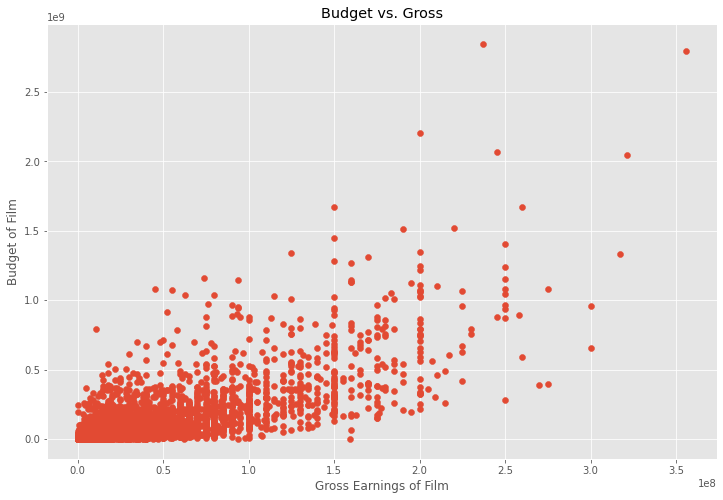

In [27]:
# scatter plot with budget vs gross

plt.scatter(x= df['budget'], y=df['gross'])
plt.title('Budget vs. Gross')
plt.xlabel('Gross Earnings of Film')
plt.ylabel('Budget of Film')
plt.show()

In [26]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime year_correct  
0   46998772.0        Warner Bros.    146.0         June  
1   58853106.0   Columbia Pictures    104.0         July  
2  538375067.0           Lucasfilm    124.0         June  
3   83453539.0  Paramount Pictures     88.0         July  
4   39846344.0      Orion Pictures     98.0         July

<AxesSubplot:xlabel='budget', ylabel='gross'>

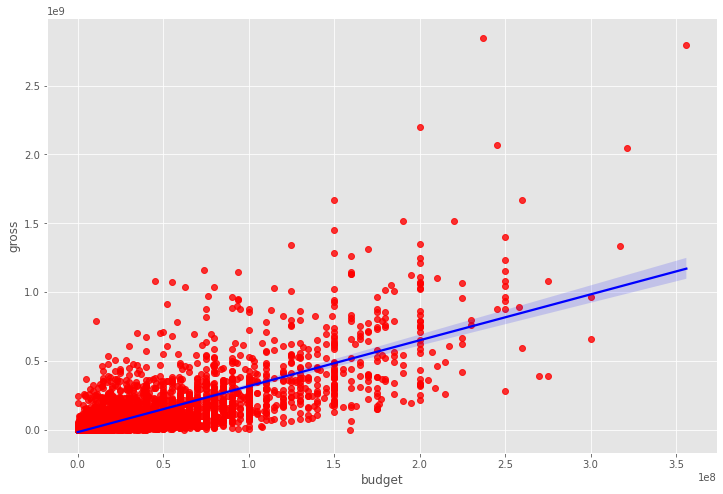

In [29]:
# plotting budget vs gross using sns

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [30]:
# checking correlation (Pearson defaulted)

df.corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

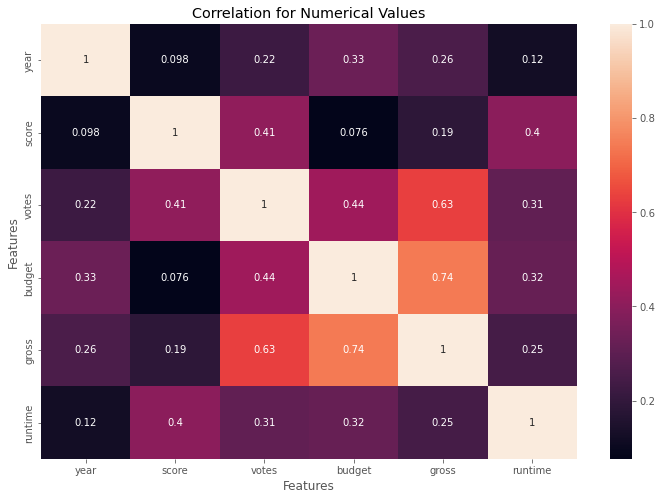

In [34]:
# finding high correlation between budget and gross
# plotting matrix using heatmap

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation for Numerical Values')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [35]:
# looking at correlation between company and gross

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime year_correct  
0   46998772.0        Warner Bros.    146.0         June  
1   58853106.0   Columbia Pictures    104.0         July  
2  538375067.0           Lucasfilm    124.0         June  
3   83453539.0  Paramount Pictures     88.0         July  
4   39846344.0      Orion Pictures     98.0         July

In [37]:
# giving columns numerical values

df_numberized = df

for column in df_numberized:
    if(df_numberized[column].dtype == 'object'):
        df_numberized[column] = df_numberized[column].astype('category')
        df_numberized[column] = df_numberized[column].cat.codes

df_numberized 

name  rating  genre  year  \
0                                           The Shining       6      6  1980   
1                                       The Blue Lagoon       6      1  1980   
2        Star Wars: Episode V - The Empire Strikes Back       4      0  1980   
3                                             Airplane!       4      4  1980   
4                                            Caddyshack       6      4  1980   
5                                       Friday the 13th       6     10  1980   
6                                    The Blues Brothers       6      0  1980   
7                                           Raging Bull       6      3  1980   
8                                           Superman II       4      0  1980   
9                                       The Long Riders       6      3  1980   
10                                Any Which Way You Can       4      0  1980   
11                               The Gods Must Be Crazy       4      1  1980   
12                                               Popeye       4      1  1980   
13                                      Ordinary People       6      6  1980   
14                                      Dressed to Kill       6      5  1980   
15                                    Somewhere in Time       4      6  1980   
16                                                 Fame       6      6  1980   
17                                               9 to 5       4      4  1980   
18                                              The Fog       6     10  1980   
19                                           Stir Crazy       6      4  1980   
20                                             Cruising       6      5  1980   
21                                        Heaven's Gate       6      1  1980   
22                                  The Final Countdown       4      0  1980   
23                                               Xanadu       4      8  1980   
24                                         Urban Cowboy       4      6  1980   
25                                       Altered States       6     10  1980   
26                                      Little Darlings       6      4  1980   
27                                    Raise the Titanic       4      0  1980   
28                                             Brubaker       6      5  1980   
29                                      American Gigolo       6      5  1980   
30                                         My Bodyguard       4      4  1980   
31                                           Prom Night       6     10  1980   
32                             Smokey and the Bandit II       4      0  1980   
33                     Cattle Annie and Little Britches       4      6  1980   
34                                 Seems Like Old Times       4      4  1980   
35                                     Private Benjamin       6      4  1980   
36                                The Hollywood Knights       6      4  1980   
37                                           Motel Hell       6      4  1980   
38                                      The Jazz Singer       4      6  1980   
39                                Coal Miner's Daughter       4      3  1980   
40                             The Watcher in the Woods       4      7  1980   
41                                       Breaker Morant       4      6  1980   
42                                        The Stunt Man       6      0  1980   
43                               Where the Buffalo Roam       6      3  1980   
44                                        The Awakening       6     10  1980   
45                        Cheech and Chong's Next Movie       6      4  1980   
46                                           The Island       6      0  1980   
47                                       The Boogey Man       6     10  1980   
48                                        The Nude Bomb       4      0  1980   
49                                   Lion of the De

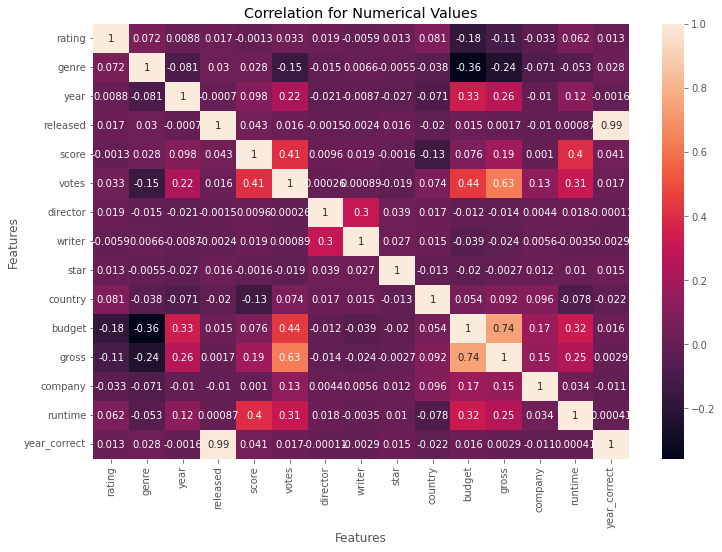

In [38]:
# showing correlation after giving all columns numerical values

correlation_matrix = df_numberized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation for Numerical Values')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [39]:
# unstacking the correlation matrix

correlation_matrix = df_numberized.corr()
correlation_paired = correlation_matrix.unstack()

correlation_paired

rating        rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star            0.013405
              country         0.081244
              budget         -0.176002
              gross          -0.107339
              company        -0.032943
              runtime         0.062145
              year_correct    0.013475
genre         rating          0.072423
              genre           1.000000
              year           -0.081261
              released        0.029822
              score           0.027965
              votes          -0.145307
              director       -0.015258
              writer          0.006567
              star           -0.005477
              country        -0.037615
              budget     

In [41]:
# 

high_correlation = correlation_paired[(correlation_paired) > 0.5]

high_correlation

rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
              year_correct    0.993694
score         score           1.000000
votes         votes           1.000000
              gross           0.630757
director      director        1.000000
writer        writer          1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
              gross           0.740395
gross         votes           0.630757
              budget          0.740395
              gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
year_correct  released        0.993694
              year_correct    1.000000
dtype: float64

In [ ]:
# company does not have high correlation between gross
# interesting to see votes and gross having that high of a correlation